In [232]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [233]:
if os.getenv("PUIDATA") is None:
    os.environ["PUIDATA"] = '%s/Puidata'%os.getenv("HOME")

In [234]:
os.getenv('PUIDATA')

'/nfshome/kc116/PUIdata'

In [235]:
!curl https://data.cityofnewyork.us/api/views/jb7j-dtam/rows.csv?accessType=DOWNLOAD > death.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91294    0 91294    0     0   422k      0 --:--:-- --:--:-- --:--:--  422k


In [236]:
#read the csv
df = pd.read_csv(os.getenv("PUIDATA")+'/'+'death.csv')

df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5
1,2011,Mental and Behavioral Disorders due to Acciden...,M,Not Stated/Unknown,5,.,.
2,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3
3,2008,Certain Conditions originating in the Perinata...,F,Other Race/ Ethnicity,.,.,.
4,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4


In [237]:
#df['Age Adjusted Death Rate'].value_counts()

In [238]:
# This drops all empty/NaN values
df2 = df.loc[(df.Deaths != '.')].copy()

In [239]:
#converts number of deaths to an int (previously an obj)
df2.Deaths = df2.Deaths.astype('int64')

#Total sum of deaths in dataset
df2.Deaths.sum()

424998

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


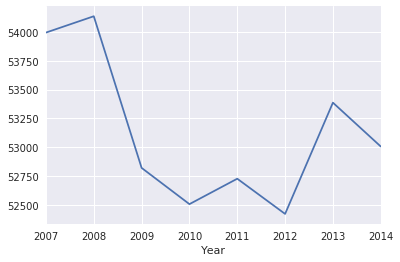

In [240]:
# This groups the number of deaths per year
df2.groupby(['Year'])['Deaths'].sum().plot()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


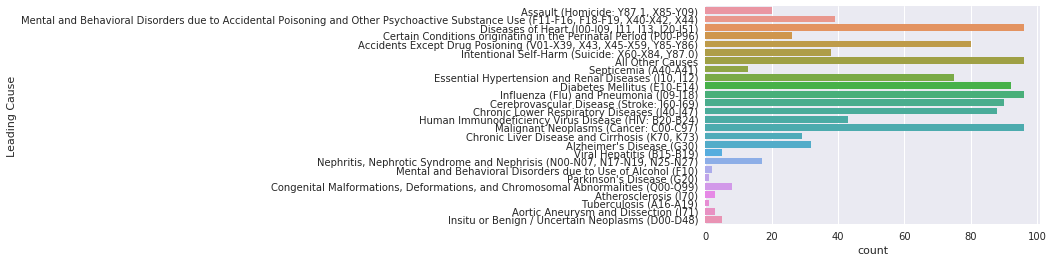

In [241]:
#Using Seaborn, this graph shows cause of death and the number of deceased per cause (not the final plot)

import seaborn as sns

sns.countplot(y='Leading Cause', data=df)

In [242]:
# Examines leading cause of death for M/F
df3 = pd.DataFrame(df2.groupby(['Leading Cause', 'Sex'])['Deaths'].count())

df3 = df3.reset_index()

df3

,Leading Cause,Sex,Deaths
0,"Accidents Except Drug Posioning (V01-X39, X43,...",F,26
1,"Accidents Except Drug Posioning (V01-X39, X43,...",M,42
2,All Other Causes,F,48
3,All Other Causes,M,48
4,Alzheimer's Disease (G30),F,24
5,"Assault (Homicide: Y87.1, X85-Y09)",M,12
6,Cerebrovascular Disease (Stroke: I60-I69),F,41
7,Cerebrovascular Disease (Stroke: I60-I69),M,39
8,Certain Conditions originating in the Perinata...,F,7
9,Certain Conditions originating in the Perinata...,M,9


In [243]:
# Here i changed all the leading cause titles to be shorter/easier to read on a plot

df3['Leading Cause'].unique()

array(['Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)',
       'All Other Causes', "Alzheimer's Disease (G30)",
       'Assault (Homicide: Y87.1, X85-Y09)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Chronic Liver Disease and Cirrhosis (K70, K73)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
       'Diabetes Mellitus (E10-E14)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Essential Hypertension and Renal Diseases (I10, I12)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Insitu or Benign / Uncertain Neoplasms (D00-D48)',
       'Intentional Self-Harm (Suicide: X60-X84, Y87.0)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Mental and Behavioral Disorders due to Accidental Po

In [244]:
df3['Leading Cause'] = df3['Leading Cause'].map({'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)': 'Accidents', 
                                                 'All Other Causes': 'All Other Causes', 
                                                 'Alzheimers Disease (G30)': 'Alzheimers Disease', 
                                                 'Assault (Homicide: Y87.1, X85-Y09)': 'Assault',
                                                 'Cerebrovascular Disease (Stroke: I60-I69)': 'Cerebrovascular Disease (Stroke)',
                                                 'Certain Conditions originating in the Perinatal Period (P00-P96)': 'Perinatal Condition',
                                                 'Chronic Liver Disease and Cirrhosis (K70, K73)': 'Chronic Liver Disease and Cirrhosis',
                                                 'Chronic Lower Respiratory Diseases (J40-J47)': 'Chronic Lower Respiratory Diseases',
                                                 'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)':'Congenital Malformations, Deformations, and Chromosomal Abnormalities',
                                                 'Diabetes Mellitus (E10-E14)': 'Diabetes Mellitus',
                                                'Diseases of Heart (I00-I09, I11, I13, I20-I51)': 'Diseases of Heart',
                                               'Essential Hypertension and Renal Diseases (I10, I12)': 'Essential Hypertension and Renal Diseases',
                                               'Human Immunodeficiency Virus Disease (HIV: B20-B24)': 'Human Immunodeficiency Virus Disease',
                                               'Influenza (Flu) and Pneumonia (J09-J18)': 'Influenza (Flu) and Pneumonia',
                                               'Insitu or Benign / Uncertain Neoplasms (D00-D48)': 'Insitu or Benign / Uncertain Neoplasms',
                                               'Intentional Self-Harm (Suicide: X60-X84, Y87.0)': 'Intentional Self-Harm (Suicide)',
                                               'Malignant Neoplasms (Cancer: C00-C97)': 'Malignant Neoplasms (Cancer)',
                                               'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)': 'Accidental Poisoning/Substance Use',
                                               'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)': 'Nephritis, Nephrotic Syndrome and Nephrisis',
                                               'Septicemia (A40-A41)': 'Septicemia',
                                               'Viral Hepatitis (B15-B19)': 'Viral Hepatitis'})

In [245]:
df3.head()

,Leading Cause,Sex,Deaths
0,Accidents,F,26
1,Accidents,M,42
2,All Other Causes,F,48
3,All Other Causes,M,48
4,NaN,F,24


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


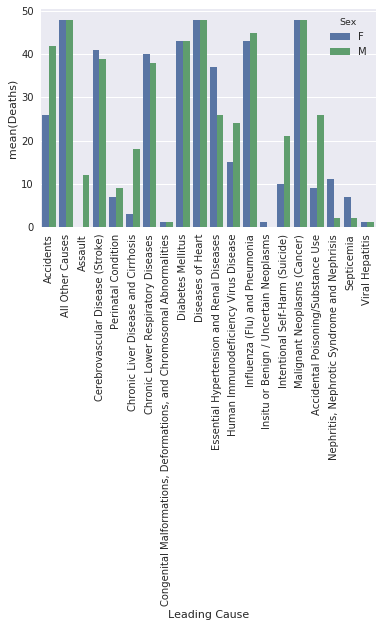

In [246]:
# This graph shows each leading cause of death and compares men/women 
sns.barplot(x='Leading Cause', y='Deaths', hue='Sex', data=df3)
plt.xticks(rotation=90)

In [247]:
df3['Leading Cause'].unique()

array(['Accidents', 'All Other Causes', nan, 'Assault',
       'Cerebrovascular Disease (Stroke)', 'Perinatal Condition',
       'Chronic Liver Disease and Cirrhosis',
       'Chronic Lower Respiratory Diseases',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities',
       'Diabetes Mellitus', 'Diseases of Heart',
       'Essential Hypertension and Renal Diseases',
       'Human Immunodeficiency Virus Disease',
       'Influenza (Flu) and Pneumonia',
       'Insitu or Benign / Uncertain Neoplasms',
       'Intentional Self-Harm (Suicide)', 'Malignant Neoplasms (Cancer)',
       'Accidental Poisoning/Substance Use',
       'Nephritis, Nephrotic Syndrome and Nephrisis', 'Septicemia',
       'Viral Hepatitis'], dtype=object)

In [248]:
# Locate only acciddental deaths in df
df5= df3.loc[(df3['Leading Cause'] == 'Accidents') | (df3['Leading Cause'] == 'Accidental Poisoning/Substance Use')].copy()

In [249]:
df5.head(10)

,Leading Cause,Sex,Deaths
0,Accidents,F,26
1,Accidents,M,42
31,Accidental Poisoning/Substance Use,F,9
32,Accidental Poisoning/Substance Use,M,26


Text(0.5,1,'Accidental Deaths per Gender')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


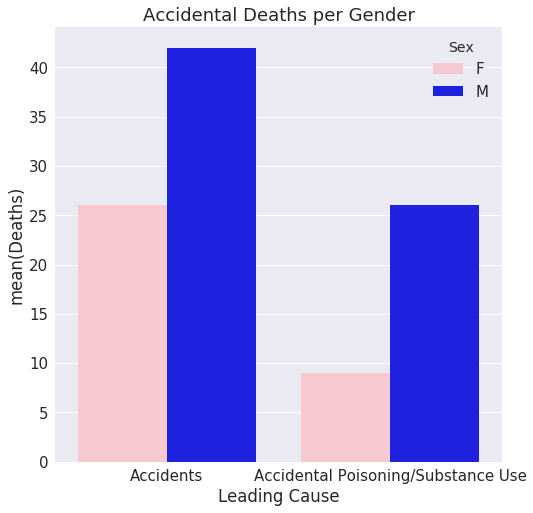

In [287]:
#Enlarged font
sns.set(font_scale=1.5) 
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(8,8))
# Change plot colors and title
sns.barplot(x='Leading Cause', y='Deaths', hue='Sex', data=df5, palette=["pink", "blue"]).set_title('Accidental Deaths per Gender')

